# Lab 7: Introduction to Markov chains and random graphs

In this lab we will be looking at Markov Processes.  Below is the code to import the modules we will be using throughout this lab.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
import networkx as nx  # If using your own computer may need to install networkx 
print ("Modules Imported!")

Modules Imported!


## Introduction to Markov Chains:

A Markov chain $(X[t]: t\geq 0)$ is a sequence of random variables such that the distribution of each variable is determined by the random variable before it.  Equivalently, it is a sequence of states visited by a form of finite state machine with random transitions.  To describe how to generate the chain we specify the initial probability distribution $\pi_0$ and a one-step transition probability matrix $P$.   We assume there is a finite state space described by {0,1,, . . . , $n-1$} for some $n$.  The intial distribution, $\pi(0)$, should be a probability vector (nonnegative entries with sum equal to one) of length $n$.   It consists of the probability the process is in a given state at time zero: ${\pi_i(0)} = P\{X[0]=i\}$ for $0\leq i \leq n-1.$    The matrix $P$ is an $n\times n$ matrix such that each row of the matrix is a probability vector.   If the state of the Markov chain at time $t-1$ is $i$ (in other words, if $X[t-1]=i$), then the (conditional) probability distribution of $X[t]$, the state at time $t$, is given by the ith row of $P.$ Additionally, we can look at the individual entries: $p_{ij}=P\left\{X[t]=j \; \big| \; X[t-1]=i\right\}$.  Below is a class that can be used to create a Markov chain.  An object in this class is created with specified values of $\pi_0$ and $P$, and can be used to calculate the state distribution at any time or to generate a sample path (i.e. a variate of the sequence of states) of the Markov chain.  

The state distributions are determined recursively as follows.  If $$\pi_i(t)=P\{X[t]=i\}$$ then by the law of total probability, $$\pi_j(t)= P\{X[t]=j\}=\sum_i P\{X[t-1]=i,X[t]=j\} =\sum_i \pi_i(t-1)p_{i,j}$$  That is, if we view $\pi(t)$ as a row vector for all $t,$ then $\pi(t)=\pi(t-1)P,$  where we have used multiplication of a row vector by a matrix.  (A nice introduction to Markov chains is given on wikipedia.)

In [12]:
# Markov chain object similar to random variable objects in scipy.stats (st)

class Markov_chain:
    def __init__(self, P, pi0):   # The transition probability matrix and initial distribution are passed
        self.P = P 
        self.pi0 = pi0
        self.n=np.size(pi0)
        if np.shape(P) != (self.n,self.n):
            print ("Error: Shape of P doesn't match pi0")
   
    def rvs(self,T):     # produce a length T segment of variates of the random process
        X = [np.random.choice(self.n, p=self.pi0)] 
        for t in range(1,T):
            X.append(np.random.choice(self.n, p=self.P[X[t-1],:]))
        return np.array(X)
    
    def pi(self,t):    # produce probability distribution at time t
        pi_new=self.pi0
        for s in range(t):
            pi_new = np.dot(pi_new, P)    # one step update of probability distribution
        return pi_new

# An example of how you can use the class to create and run through a simple two state chain
P=np.array([[0.9,0.1],[0.1,0.9]])
pi0=np.array([0.1,0.9])
print ('Simulated state sequence')
markov=Markov_chain(P,pi0)  
print (markov.rvs(100))
for t in range(20):
    print ("Distribution at time", t, ":", markov.pi(t))

Simulated state sequence
[1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Distribution at time 0 : [0.1 0.9]
Distribution at time 1 : [0.18 0.82]
Distribution at time 2 : [0.244 0.756]
Distribution at time 3 : [0.2952 0.7048]
Distribution at time 4 : [0.33616 0.66384]
Distribution at time 5 : [0.368928 0.631072]
Distribution at time 6 : [0.3951424 0.6048576]
Distribution at time 7 : [0.41611392 0.58388608]
Distribution at time 8 : [0.43289114 0.56710886]
Distribution at time 9 : [0.44631291 0.55368709]
Distribution at time 10 : [0.45705033 0.54294967]
Distribution at time 11 : [0.46564026 0.53435974]
Distribution at time 12 : [0.47251221 0.52748779]
Distribution at time 13 : [0.47800977 0.52199023]
Distribution at time 14 : [0.48240781 0.51759219]
Distribution at time 15 : [0.48592625 0.51407375]
Distribution at time 16 : [0.488741 0

We won't go into this deeply, but notice how as the distributions change in time, they appear to be converging. For some Markov chains, there exists a limit for the distribution. If this occurs then the limit distribution $\pi$ satisfies $\pi = \pi P$ and $\pi$ is called an *equilibrium distribution.*

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Imagine that the states {0, . . . , n-1} of a particular Markov chain are the nodes of a ring graph, with state 0 following state n-1.   Create a Markov_chain object for n=6 with inital state 0 (so x[0]=0 with probability one) with the following transition probabilities:  given X[t-1]=i, X[t] is equal to i with probability 0.8 and to i+1 (modulo n) with probability 0.2.
<ol>
<li> Print the first 100 states for a simulation of the chain.</li>
<li> Simulate the chain for 10,000 time units, and calculate the number of complete revolutions the chain makes around the ring, divided by 10,000.  This is an estimate of the long term cycle rate for the Markov chain.  Repeat the experiment ten times to get an idea of the variation from one experiment to the next.</li>
<li> Give an analytical argument for what the long term cycle rate for this Makov chain should be.</li>

In [14]:
# Your code here
####################### part 1 #######################
print("-------------------------- part 1 -------------------------")
pi0 = np.array([1, 0, 0, 0, 0, 0])
P = np.array([[0.8, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.2],
              [0.2, 0.0, 0.0, 0.0, 0.0, 0.8]])
markov = Markov_chain(P, pi0)
print(markov.rvs(100))

####################### part 2 #######################
print("-------------------------- part 2 -------------------------")
simulate = markov.rvs(10000)
cnt_list = []
p_list = []
for j in range(10):
    cnt = 0
    for i in range(10000):
        if simulate[i] == 5 and simulate[i-1] != 5:
            cnt += 1
    cnt_list.append(cnt)
    p_list.append(cnt/10000)
print("Average number of complete revolutions:", np.mean(cnt_list))
print("Average long term cycle rate:", np.mean(p_list))
    

-------------------------- part 1 -------------------------
[0 0 1 1 2 2 2 2 2 3 3 3 4 4 4 4 4 5 5 0 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 5 5 5 5 5 5 5 5 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 3 3 4 4 5 5 5 5 5 5 5 5 5 5 5 5 0 0 1 1]
-------------------------- part 2 -------------------------
Average number of complete revolutions: 334.0
Average long term cycle rate: 0.0334


__Answer:__ (Your answer here)

## part1

The first 100 states for a simulation is shown above.

## part2

The results are shown above.

Average umber of complete revolutions: 334

Average long term cycle rate: 0.0334

## part3

The probability that transfer to the next state 0.2, and it's a geometric distribution. Let $X$ be a random variable indicating that the transfer is successfully happened, then $E[X] = \frac{1}{0.2} = 5$. For a complete cycle there should be 6 times of 5, which is 30. Therefore, the transfer probability is $\frac{1}{30} = 0.0333$

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Markov Gibberish

Let's look at some applications of a Markov Chain. When I was younger I remember using AIM (instant messenger) to talk to my friends. At some point people started to create bots which could hold conversations with users. Of course we had fun trying to get them to say things that didn't make sense, but the idea that it could generate somewhat relevant conversations was pretty cool. We're going to build a rudimentary version of that here. The code below generates text based on a large sample text, such that each word is generated based on the two words just before it.  The generated sequence of words is given by a 2-Markov chain (here "2" means that the distribution of the value of each word is determined by the two previous words, instead of just the one previous word).  That means that any three consecutive words in the generated text are also consecutive words somewhere in the sample text.   If words w1 w2 were the last two words added to the generated text string, then to generate the next word we look for all occurrences of w1 w2 as consecutive words in the sample text, and see what word was just after them for each occurrence.   The randomly generated text selects the next word to match one of those occurrences, selected at random with equal probability.

In [4]:
# Based on http://agiliq.com/blog/2009/06/generating-pseudo-random-text-with-markov-chains-u/    --BH
# Next word of random string is selected from possible word that follow the last two words.


class Markov_text:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def triples(self):
    #Generates triples from the given data string. So if our string were
    # "What a lovely day", we'd generate (What, a, lovely) and then (a, lovely, day)."""
           
        if self.word_size < 3:
            return
         
        for i in range(self.word_size - 2):
            yield (self.words[i], self.words[i+1], self.words[i+2])    #Like return but returns a generator to be used once
               
    def database(self):
        for w1, w2, w3 in self.triples():
            key = (w1, w2)
            if key in self.cache:
                self.cache[key].append(w3)
            else:
                self.cache[key] = [w3]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-3)
        w1, w2 = self.words[seed], self.words[seed+1]  # Initial key is (w1,w2)
        gen_words = [w1,w2]
        for i in range(size):
            w1, w2 = w2, np.random.choice(self.cache[(w1, w2)])
            gen_words.append(w2)
        return ' '.join(gen_words)
                
        
        
file_ = open('Jeeves.txt')
markov = Markov_text(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text

# The above has a slight bug.   It is possible for the key to be the
# last two words in the text file and have no entry in the dictionary.
# This won't happen if the last two words in the text file appear
# consecutively somewhere else in the file.   -BH

'it isn\'t only that Jeeves\'s judgment about suits is sound. But I as near as a possibility." "Did it, by Jove! But then Rocky\'s letters, based on sound foundations. No doubt we shall always be counted on to us quite distinctly. Stealthy footsteps, by George! And then the gong went and the parcel was delivered. It was Bobbie, ambling gently through life, a dear old Freddie that to know Corky when I said to Corky. "He will think Miss Singer to call, said the girl. "We were wondering what hit them, of picking themselves up and you have a dozen chickens each'

With punctuation and everything, this initially looks like a bit of a mess. However, the sentences themselves are coming together and can make a little bit of sense. It is a very primitive version of those bots on instant messaging.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using the class above, do the following:
<ol><li> Find your own text file or copy and paste from somewhere and use the text to create gibberish from that. To work well, your file really needs to contain a large amount of text. The "Jeeves" file was pulled from a short story. Print out your own 100 word gibberish paragraph based on the text file you used.</li>
<li> Rewrite the code to create a 1-Markov Chain of the words instead of the 2-Markov Chain given above. Print out your own 100 word gibberish paragraph from this.</li>
<li> Rewrite the code to create a 3-Markov Chain of the words instead of the 2-Markov Chain given above. Print out your own 100 word gibberish paragraph from this.</li>
<li> Comment on the qualitative differences of your paragraphs using these methods.</li>

In [5]:
# Your code here (add additional code cells if necessary)
############################ part 1 #############################
print("------------------------------ part 1 --------------------------------")
with open("story.txt", 'r') as f:
    markov = Markov_text(f)
print("The result of 2-Markov Chain:")
print(markov.generate_markov_text())
print()

############################ part 2 #############################
print("------------------------------ part 2 --------------------------------")
class Markov_text_k:
    def __init__(self, open_file, k):   # The single parameter passed is a file handle
        self.k = k
        self.cache = {}  # Will be dictionary mapping a key (two consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words

    def k_tuple(self):
        # return the k+1 tuple
        if self.word_size < self.k + 1:
            return
        for i in range(self.word_size - self.k):
            ret = []
            for j in range(self.k + 1):
                ret.append(self.words[i+j])
            yield ret
               
    def database(self):
        for k_tuple in self.k_tuple():
            key = tuple(k_tuple[:-1])
            if key in self.cache:
                self.cache[key].append(k_tuple[-1])
            else:
                self.cache[key] = [k_tuple[-1]]
                         
    def generate_markov_text(self, size=100):
        seed = np.random.randint(0, self.word_size-3)
        cur = [self.words[seed+i] for i in range(self.k)]
        gen_words = np.copy(cur).tolist()
        for i in range(size):
            new = np.random.choice(self.cache[tuple(cur)])
            cur.pop(0)
            cur.append(new)
            gen_words.append(new)
        return ' '.join(gen_words)

with open('story.txt', 'r') as f:
    markov1 = Markov_text_k(f, 1)
print('The result of 1-Markov Chain:')
print(markov1.generate_markov_text())

############################ part 3 #############################
print("------------------------------ part 3 --------------------------------")
with open('story.txt', 'r') as f:
    markov3 = Markov_text_k(f, 3)
print('The result of 3-Markov Chain:')
print(markov3.generate_markov_text())


------------------------------ part 1 --------------------------------
The result of 2-Markov Chain:
but empty pockets forbade. Tipsy men drank up their wages in the afternoon with a great racket at our school, and get heaps of things, while I blind your eyes and put you in your sleep," said a lame child, leaning on her lips, and vanished when she was again. "How splendid! Who is it for? What is that noise? Where is mamma?" cried Effie, astonished at the sight. "Never give up your faith in the middle of each, drawing on his mittens and hoods, dolls and candy. Parcel after parcel was sent home; but when Effie returned she saw many of

------------------------------ part 2 --------------------------------
The result of 1-Markov Chain:
a crowd of books, or drew on the girls in which she saw two days before Effie up his coming. "I never would be sent flying away scampered the tramp of Christmas in at the sweet words of books, or a thoughtful face, while people had everything a surprise; fo

__Answer:__ (Your answer here)

## Part 1 & 2 & 3

The results are shown above.

## Part 4

Although they all still make little sense, the results in part 3 is more natural than part 2 and part 1. It seems that the more the dependence on the previous words is the more natual and better expression.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Random Graphs and Working with Graphs

Markov chains that are time independent and finite can be represented really well by graphs. I'm sure you've used finite state machines to describe processes or sequences in some of your other classes. They can also be useful in analyzing or describing networks. Networkx is an extensive Python package for generating and analyzing graphs (the kind with nodes and edges) and can also plot them.  The following code adapted from the networkx webpage generates a random undirected graph by placing nodes at random locations within the unit square and connecting nodes together if their distance is less than a specified threshold.

The center node is located at: 0.5434306844979314 , 0.5797813379682306
The graph is connected


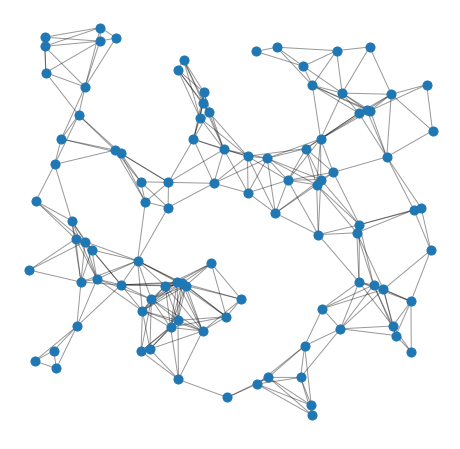

In [7]:
#import networkx as nx  DEBUGGING

d=0.16 # distance threshold, pairs of nodes within distance d are connected by an edge
G=nx.random_geometric_graph(100,d)  #100 nodes in unit square, distance threshold d
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')  # pos is a dictionary, with the indices as keys, ranging from 0 to 99

# find node nearest to (0.5,0.5), called the center node
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

print ('The center node is located at:', pos[ncenter][0], ',', pos[ncenter][1])
# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)  #p is dictionary: keys are nodes, values are distances to center
                                                    #Node not connected to the center node are not listed in p.
                                                    # p include the center node itself.

if nx.is_connected(G):   # The Networkx method is_connected checks for connectness
    print ("The graph is connected")
else: print ("The graph is not connected")

plt.figure(figsize=(8,8))
# nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)  #All edges are drwn
nx.draw_networkx_edges(G,pos,alpha=0.4)  #All edges are drwn
nx.draw_networkx_nodes(G,pos,alpha=0.3,node_size=80)  #All nodes are drawn but nearly transparent
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),   # Nodes connected to center node are drawn, closer nodes have darker color
                       node_size=80)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

Excellent documentation for NetworkX is available online (search for NetworkX documentation). We find a plethora of classes for generating both undirected graphs (no arrows on the edges) and directed graphs.   Run the code in the above cell a few dozen times, and see how often the graph generated is *connected*, meaning that there is a path through the graph from any node to any other node.   One way a graph could be not connnected is to have an isolated node, which is a node with no neighbors.   Also, try changing the value of the threshold d and seeing the effect on connectivity.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>**   Estimate the probability of connectivity for the above model (100 nodes at random locations in unit square with edges between pairs of nodes at distance d or smaller) for values of d in 0.10, 0.11, . . . , 0.20 by generating 1000 instances for each d and seeing the fraction of them that are connected. Is there a sort of threshold where the odds of a connected graph jumps significantly?

In [8]:
# Your code here

G=nx.random_geometric_graph(100,d)

ds = [0.1 + 0.01*i for i in range(11)]
p = []
for d in ds:
    cnt = 0
    for _ in range(1000):
        G=nx.random_geometric_graph(100,d)
        if nx.is_connected(G):
            cnt += 1
    p.append(cnt/1000)

for i in range(11):
    print("d = {:.2f}, p = {:.4f}".format(ds[i], p[i]))


d = 0.10, p = 0.0000
d = 0.11, p = 0.0000
d = 0.12, p = 0.0010
d = 0.13, p = 0.0110
d = 0.14, p = 0.1270
d = 0.15, p = 0.2950
d = 0.16, p = 0.5120
d = 0.17, p = 0.6690
d = 0.18, p = 0.8260
d = 0.19, p = 0.8800
d = 0.20, p = 0.9230


__Answer:__ (Your answer here)

The results are shown above. There are some thresholds like, from d = 0.13 to d = 0.14, probability jumps from 0.0230 to 0.1210 (10 times jump); and from d = 0.12 to d = 0.13, probability jumps from 0.00 to 0.0230 (from zero to positive jump).

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

The probability of connectivity can be approximately computed analytically as follows.  You might have noticed in the simulations that the main cause of disconnectivity is having at least one isolated node (no neighbors).

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**   Consider the same model.  Imagine that 100 nodes, numbered from 1 to 100, are independently placed in the unit square with a uniform distribution for each node, and then edges are placed between pairs of nodes at distance d or smaller.  Except for the second half of the fourth part below, your answers should be an expression involving $d.$   No computation is required.
<ol><li> Focus on node 1. Suppose for simplicity it is not near the boundary of the square, so the entire disk of radius $d$ around the node is in the square.   What is the probability that a given other node (say, node 2) is *not* within distance $d$ of node 1?
<li>  What is the probability node 1 is isolated (i.e. *none* of the other nodes is within distance $d$ of node 1)?
<li>  What is the expected number of isolated nodes?
<li>  Assume (this is a reasonable approximation) the total number of isolated nodes has the Poisson distribution with mean given by the answer to the previous problem part.   What is the probability that there are no isolated nodes?
Compute the numerical values for  d in 0.10, 0.11, . . . , 0.20 and compare to the estimated probability the
graph is connected in Problem 3. </ol>

__Answer:__ (Your answer here)

## part 1

The probability is the area of the squre minus the disk, which is $p = 1 - \pi d^2$.

## part 2

99 other nodes are not in the region with radius $d$, which are all mutually independent events. Therefore the probability is $P = (1 - \pi d^2)^2$.

## part 3

This is a binomial distribution with $P = (1 - \pi d^2)^2$ and $n = 100$. So the expected number is $E[X] = 100 * P = 100(1 - \pi d^2)^{99}$.

## part 4

If the total number of isolated nodes has the Poisson distribution with mean given by the answer to the previous problem part, then the probability is $P(k) = \frac{e^{-\lambda} \lambda^k}{k!}$ with $\lambda = 100(1 - \pi d^2)^{99}$. If k = 0, then $P(k = 0) = e^{-100(1 - \pi d^2)^{99}}$

The results are shown below. The probabilities calculated here are larger than the probabilities estimated before, because before the computations here we assume that the disk with radius $d$ of all the nodes are fully contained in the squre. However, in reality there are nodes near the edges and therefore the probability of connection is slightly smaller.

In [9]:
# Your code here (if necessary)
from math import pi, exp
for d in ds:
    lamb = 100 * (1 - pi*d*d)**99
    print("d = {:.2f}, p = {}".format(d, exp(-lamb)))

d = 0.10, p = 0.014375382556273152
d = 0.11, p = 0.11573548129613277
d = 0.12, p = 0.35976906692722066
d = 0.13, p = 0.6368236824267614
d = 0.14, p = 0.8309712238173423
d = 0.15, p = 0.9319422565913525
d = 0.16, p = 0.9754666715905875
d = 0.17, p = 0.9919479603219504
d = 0.18, p = 0.9975789752005879
d = 0.19, p = 0.999332667029149
d = 0.20, p = 0.9998316800547294


**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-4 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 